## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.219198 -0.635992 -0.505525  0.290048  0.607877 -0.206463
1 -0.818843  1.560489 -0.721780  1.275987 -1.541329  0.578312
2 -1.532208 -0.720180  0.718331  0.922014 -1.500607 -1.068616
3  0.705659 -1.198844 -1.025085 -0.475694  1.347014 -0.297560
4  1.145283  1.611903  0.386743  0.342190  0.849897  0.397796


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0171573	total: 58.8ms	remaining: 58.7s
1:	learn: 1.0059700	total: 59.4ms	remaining: 29.6s
2:	learn: 0.9966876	total: 60ms	remaining: 19.9s
3:	learn: 0.9867695	total: 60.5ms	remaining: 15.1s
4:	learn: 0.9776568	total: 61ms	remaining: 12.1s
5:	learn: 0.9689876	total: 61.5ms	remaining: 10.2s
6:	learn: 0.9581267	total: 62ms	remaining: 8.8s
7:	learn: 0.9478749	total: 62.6ms	remaining: 7.76s
8:	learn: 0.9389628	total: 63.1ms	remaining: 6.95s
9:	learn: 0.9307437	total: 63.5ms	remaining: 6.29s
10:	learn: 0.9213544	total: 64ms	remaining: 5.75s
11:	learn: 0.9118846	total: 64.5ms	remaining: 5.31s
12:	learn: 0.9036265	total: 65ms	remaining: 4.93s
13:	learn: 0.8946075	total: 65.5ms	remaining: 4.61s
14:	learn: 0.8870926	total: 66ms	remaining: 4.34s
15:	learn: 0.8780382	total: 66.6ms	remaining: 4.09s
16:	learn: 0.8693905	total: 67.1ms	remaining: 3.88s
17:	learn: 0.8612971	total: 67.5ms	remaining: 3.68s
18:	learn: 0.8535638	total: 68ms	remaining: 3.51s
19:	lea

87:	learn: 0.4602496	total: 104ms	remaining: 1.07s
88:	learn: 0.4560959	total: 104ms	remaining: 1.07s
89:	learn: 0.4528471	total: 105ms	remaining: 1.06s
90:	learn: 0.4492918	total: 106ms	remaining: 1.05s
91:	learn: 0.4455765	total: 106ms	remaining: 1.05s
92:	learn: 0.4418154	total: 107ms	remaining: 1.04s
93:	learn: 0.4379961	total: 107ms	remaining: 1.03s
94:	learn: 0.4341764	total: 108ms	remaining: 1.02s
95:	learn: 0.4309540	total: 108ms	remaining: 1.02s
96:	learn: 0.4274724	total: 108ms	remaining: 1.01s
97:	learn: 0.4258900	total: 108ms	remaining: 998ms
98:	learn: 0.4226566	total: 109ms	remaining: 991ms
99:	learn: 0.4192055	total: 109ms	remaining: 983ms
100:	learn: 0.4155212	total: 110ms	remaining: 977ms
101:	learn: 0.4126507	total: 110ms	remaining: 970ms
102:	learn: 0.4093498	total: 111ms	remaining: 963ms
103:	learn: 0.4064885	total: 111ms	remaining: 956ms
104:	learn: 0.4030996	total: 111ms	remaining: 949ms
105:	learn: 0.4000709	total: 112ms	remaining: 943ms
106:	learn: 0.3970088	tot

249:	learn: 0.1439664	total: 183ms	remaining: 550ms
250:	learn: 0.1431297	total: 184ms	remaining: 549ms
251:	learn: 0.1421987	total: 185ms	remaining: 548ms
252:	learn: 0.1412943	total: 185ms	remaining: 546ms
253:	learn: 0.1403270	total: 185ms	remaining: 545ms
254:	learn: 0.1393642	total: 186ms	remaining: 543ms
255:	learn: 0.1384544	total: 186ms	remaining: 542ms
256:	learn: 0.1375246	total: 187ms	remaining: 540ms
257:	learn: 0.1366839	total: 191ms	remaining: 550ms
258:	learn: 0.1357769	total: 192ms	remaining: 548ms
259:	learn: 0.1349022	total: 192ms	remaining: 547ms
260:	learn: 0.1339931	total: 193ms	remaining: 545ms
261:	learn: 0.1330579	total: 193ms	remaining: 544ms
262:	learn: 0.1321310	total: 194ms	remaining: 543ms
263:	learn: 0.1313242	total: 194ms	remaining: 542ms
264:	learn: 0.1304169	total: 195ms	remaining: 540ms
265:	learn: 0.1295436	total: 195ms	remaining: 539ms
266:	learn: 0.1286986	total: 196ms	remaining: 537ms
267:	learn: 0.1280289	total: 196ms	remaining: 536ms
268:	learn: 

431:	learn: 0.0445369	total: 279ms	remaining: 367ms
432:	learn: 0.0443275	total: 280ms	remaining: 366ms
433:	learn: 0.0440516	total: 280ms	remaining: 365ms
434:	learn: 0.0439173	total: 280ms	remaining: 364ms
435:	learn: 0.0437151	total: 281ms	remaining: 363ms
436:	learn: 0.0435287	total: 282ms	remaining: 363ms
437:	learn: 0.0433463	total: 282ms	remaining: 362ms
438:	learn: 0.0430797	total: 283ms	remaining: 361ms
439:	learn: 0.0428863	total: 283ms	remaining: 360ms
440:	learn: 0.0426028	total: 284ms	remaining: 359ms
441:	learn: 0.0423254	total: 284ms	remaining: 359ms
442:	learn: 0.0420680	total: 285ms	remaining: 358ms
443:	learn: 0.0419059	total: 285ms	remaining: 357ms
444:	learn: 0.0417472	total: 285ms	remaining: 356ms
445:	learn: 0.0414987	total: 286ms	remaining: 355ms
446:	learn: 0.0413644	total: 286ms	remaining: 354ms
447:	learn: 0.0412120	total: 287ms	remaining: 353ms
448:	learn: 0.0410819	total: 287ms	remaining: 352ms
449:	learn: 0.0408984	total: 287ms	remaining: 351ms
450:	learn: 

599:	learn: 0.0207490	total: 361ms	remaining: 241ms
600:	learn: 0.0207051	total: 362ms	remaining: 240ms
601:	learn: 0.0206431	total: 362ms	remaining: 240ms
602:	learn: 0.0205143	total: 363ms	remaining: 239ms
603:	learn: 0.0204197	total: 366ms	remaining: 240ms
604:	learn: 0.0203236	total: 368ms	remaining: 240ms
605:	learn: 0.0202636	total: 368ms	remaining: 240ms
606:	learn: 0.0201998	total: 369ms	remaining: 239ms
607:	learn: 0.0201268	total: 369ms	remaining: 238ms
608:	learn: 0.0200042	total: 370ms	remaining: 238ms
609:	learn: 0.0199426	total: 370ms	remaining: 237ms
610:	learn: 0.0197900	total: 371ms	remaining: 236ms
611:	learn: 0.0196999	total: 371ms	remaining: 235ms
612:	learn: 0.0196596	total: 372ms	remaining: 235ms
613:	learn: 0.0196001	total: 372ms	remaining: 234ms
614:	learn: 0.0194828	total: 373ms	remaining: 233ms
615:	learn: 0.0193951	total: 373ms	remaining: 233ms
616:	learn: 0.0193286	total: 374ms	remaining: 232ms
617:	learn: 0.0192261	total: 374ms	remaining: 231ms
618:	learn: 

779:	learn: 0.0100511	total: 462ms	remaining: 130ms
780:	learn: 0.0100276	total: 462ms	remaining: 130ms
781:	learn: 0.0100047	total: 463ms	remaining: 129ms
782:	learn: 0.0099822	total: 463ms	remaining: 128ms
783:	learn: 0.0099530	total: 463ms	remaining: 128ms
784:	learn: 0.0099246	total: 464ms	remaining: 127ms
785:	learn: 0.0099034	total: 464ms	remaining: 126ms
786:	learn: 0.0098948	total: 465ms	remaining: 126ms
787:	learn: 0.0098533	total: 465ms	remaining: 125ms
788:	learn: 0.0098450	total: 465ms	remaining: 124ms
789:	learn: 0.0098069	total: 466ms	remaining: 124ms
790:	learn: 0.0097667	total: 466ms	remaining: 123ms
791:	learn: 0.0097389	total: 467ms	remaining: 123ms
792:	learn: 0.0096926	total: 467ms	remaining: 122ms
793:	learn: 0.0096724	total: 467ms	remaining: 121ms
794:	learn: 0.0096271	total: 468ms	remaining: 121ms
795:	learn: 0.0096000	total: 469ms	remaining: 120ms
796:	learn: 0.0095540	total: 469ms	remaining: 119ms
797:	learn: 0.0095098	total: 469ms	remaining: 119ms
798:	learn: 

949:	learn: 0.0056383	total: 544ms	remaining: 28.6ms
950:	learn: 0.0056289	total: 545ms	remaining: 28.1ms
951:	learn: 0.0056019	total: 545ms	remaining: 27.5ms
952:	learn: 0.0055949	total: 546ms	remaining: 26.9ms
953:	learn: 0.0055646	total: 546ms	remaining: 26.3ms
954:	learn: 0.0055520	total: 547ms	remaining: 25.8ms
955:	learn: 0.0055429	total: 547ms	remaining: 25.2ms
956:	learn: 0.0055130	total: 548ms	remaining: 24.6ms
957:	learn: 0.0055033	total: 548ms	remaining: 24ms
958:	learn: 0.0054798	total: 548ms	remaining: 23.4ms
959:	learn: 0.0054584	total: 550ms	remaining: 22.9ms
960:	learn: 0.0054467	total: 551ms	remaining: 22.4ms
961:	learn: 0.0054380	total: 552ms	remaining: 21.8ms
962:	learn: 0.0054313	total: 552ms	remaining: 21.2ms
963:	learn: 0.0054248	total: 553ms	remaining: 20.6ms
964:	learn: 0.0054022	total: 553ms	remaining: 20.1ms
965:	learn: 0.0053906	total: 554ms	remaining: 19.5ms
966:	learn: 0.0053680	total: 554ms	remaining: 18.9ms
967:	learn: 0.0053435	total: 555ms	remaining: 18

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

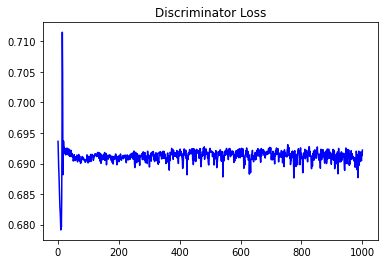

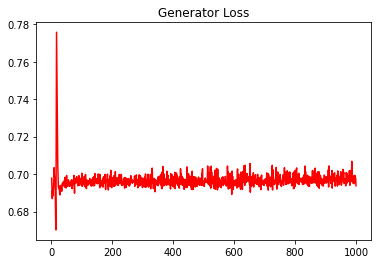

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0664777784523537


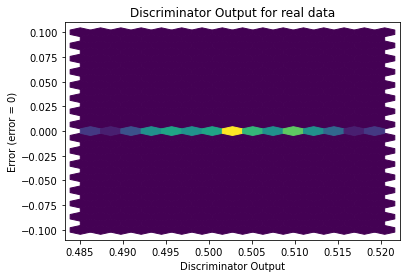

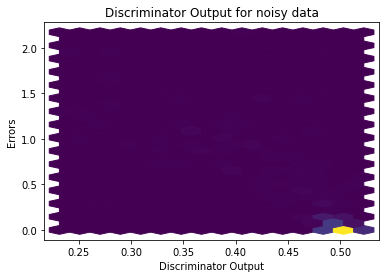

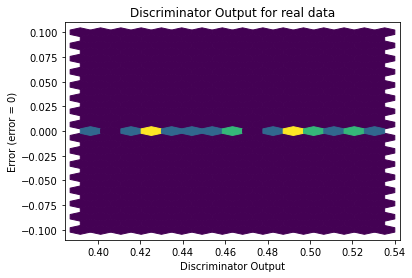

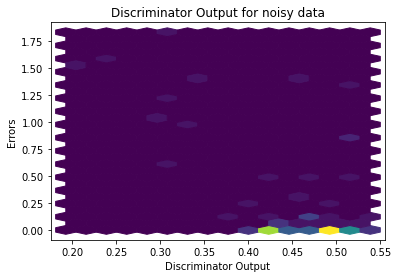

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


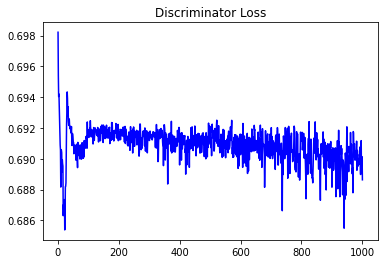

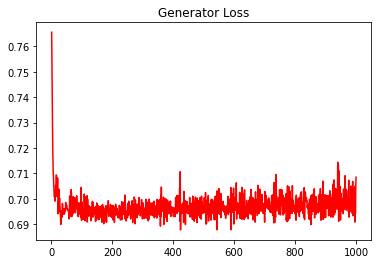

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05941230928177281


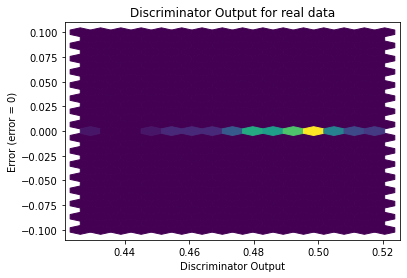

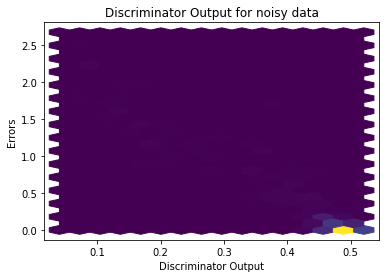

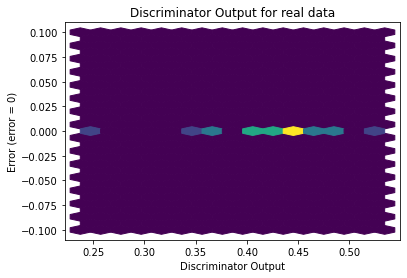

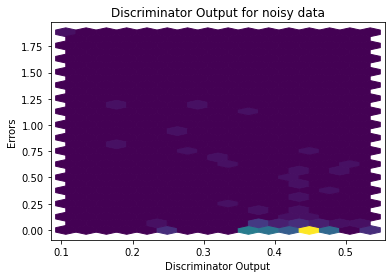

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3184]], requires_grad=True)
